# A CNN model that can predict the differnt images of digits from MNIST dataset

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow as tf

In [2]:
# import data from keras dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [5]:
# train_images[0] # 2d array

In [6]:
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32) #will result in a 3D array with shape (m, n, 1). This is often used when working with grayscale images to represent them as 3D arrays with a single channel.
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)


In [8]:
# train_images[0] # 3d array 

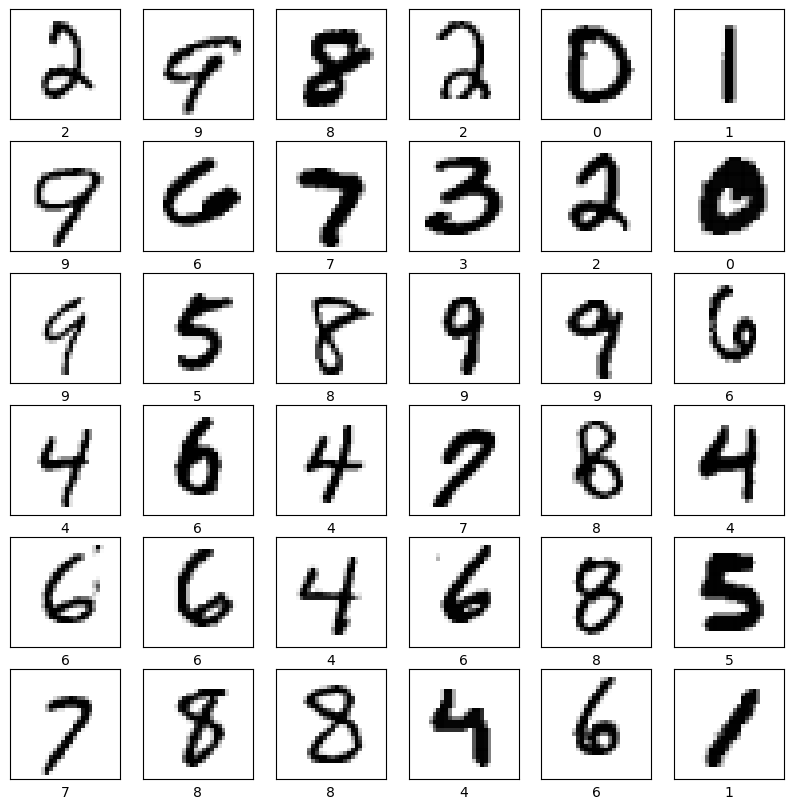

In [16]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [17]:
# import tensorflow as tf

# def build_cnn_model():
#     cnn_model = tf.keras.Sequential([
#         # First Convolutional Layer
#         tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
#         # First Max Pooling Layer
#         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        
#         # Second Convolutional Layer
#         tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#         # Second Max Pooling Layer
#         tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        
#         tf.keras.layers.Flatten(),
        
#         # Dense Layer with 128 neurons and ReLU activation
#         tf.keras.layers.Dense(128, activation=tf.nn.relu),
        
#         # Output Dense Layer with 10 neurons (assuming 10 classes for classification) and softmax activation
#         tf.keras.layers.Dense(10, activation=tf.nn.softmax)
#     ])
    
#     return cnn_model

# cnn_model = build_cnn_model()

# # Initialize the model by passing some data through
# cnn_model.predict(train_images[[0]])

# # Print the summary of the layers in the model.
# print(cnn_model.summary())


In [21]:
# Defining  CNN model using the build_cnn function

def build_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


In [22]:
# calling the CNN model
model = build_cnn()

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
model.fit(train_images, train_labels, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1258 - accuracy: 0.9610
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0419 - accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0202 - accuracy: 0.9936
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0159 - accuracy: 0.9947


In [34]:
predictions = model.predict(test_images)


313/313 [==============================] - 3s 7ms/step


In [37]:
predictions[455]

array([1.3790689e-07, 9.9998581e-01, 2.0583168e-06, 9.0734847e-10,
       2.5502018e-06, 8.9972779e-10, 1.3230308e-08, 8.9524556e-06,
       2.6273011e-07, 1.6169700e-07], dtype=float32)

Predicted digit: 1
True label of this digit is: 1


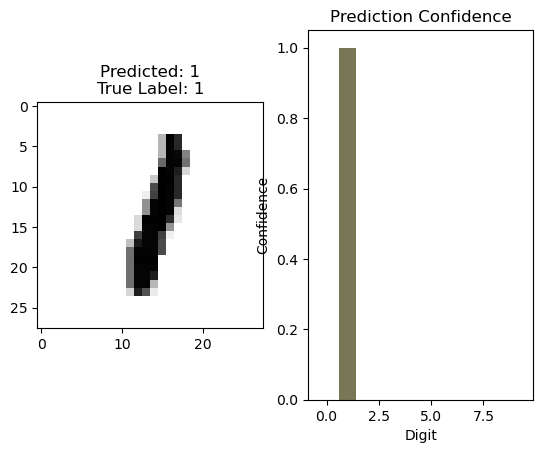

In [39]:
import matplotlib.pyplot as plt
import numpy as np


# Identify the digit with the highest confidence prediction for the first image
prediction = np.argmax(predictions[455])
print("Predicted digit:", prediction)

# Check the true label for the first image
print("True label of this digit is:", test_labels[455])

# Visualize classification results for the first image
plt.subplot(1, 2, 1)
plt.imshow(test_images[455, :, :, 0], cmap=plt.cm.binary)
plt.title(f'Predicted: {prediction}\nTrue Label: {test_labels[455]}')
plt.subplot(1, 2, 2)
plt.bar(range(10), predictions[455], color="#777757")
plt.xlabel('Digit')
plt.ylabel('Confidence')
plt.title('Prediction Confidence')

plt.show()
